# 1회차 실습 과제: 통계적 사고와 기술통계

## 문제 항목

| 문제 | 주제 | 사용 데이터 |
|------|------|-----------|
| 문제 1 | 중심 경향 측도 (평균, 중앙값, 최빈값, 절사평균, 가중평균) | EMISSIONS |
| 문제 2 | 산포도 측도 (분산, 표준편차, 범위, IQR, 변동계수, 이상치 탐지) | COMB (L/100 km), ENGINE SIZE |
| 문제 3 | 분포의 형태 (왜도, 첨도) | 수치형 변수 전체 |
| 도전 과제 | 라이브러리 없이 기술통계 직접 구현 | 순수 Python |

---

## 데이터 설명

**파일명**: `차량_연비_데이터(2000-2022).csv`

2000~2022년 차량 연비 데이터

| 컬럼 | 설명 |
|------|------|
| YEAR | 차량 제조 연도 |
| MAKE | 제조사 (예: 현대, BMW) |
| MODEL | 차량 모델명 (예: Sonata, Model S) |
| VEHICLE CLASS | 차량 분류 (예: SUV, 세단). 4WD/4X4: 사륜구동, AWD: 전륜구동, FFV: 유연연료 차량 |
| ENGINE SIZE | 엔진 배기량 (단위: 리터) |
| CYLINDERS | 실린더 개수. 출력과 연비에 영향 |
| TRANSMISSION | 변속기 종류. A: 자동, M: 수동, AS: 자동 선택변속기, AV: 무단변속기. 숫자는 기어 수(3~10단) |
| FUEL | 연료 종류. X: 일반 가솔린, Z: 고급 가솔린, D: 디젤, E: 에탄올(E85), N: 천연가스 |
| CITY (L/100 km) | 도심 연비 (연료 소비량) |
| HWY (L/100 km) | 고속도로 연비 (연료 소비량) |
| COMB (L/100 km) | 복합 연비. 도심(55%) + 고속도로(45%) 종합 |
| COMB (mpg) | 복합 연비 (단위: MPG) |
| EMISSIONS | CO2 배출량 (단위: g/km) |

---

In [1]:
print('hello')

hello


In [2]:
# 필수 라이브러리 Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
import platform
import os

warnings.filterwarnings('ignore')

# 운영체제별 한글 폰트 설정
if platform.system() == 'Windows':
    plt.rcParams['font.family'] = 'Malgun Gothic'
elif platform.system() == 'Darwin':
    plt.rcParams['font.family'] = 'AppleGothic'
else:
    plt.rcParams['font.family'] = 'NanumGothic'

plt.rcParams['axes.unicode_minus'] = False
np.random.seed(42)

print("="*60)
print("1회차 실습 과제: 통계적 사고와 기술통계")
print("="*60)


1회차 실습 과제: 통계적 사고와 기술통계


In [3]:
# 데이터 로드
DATA_PATH = os.path.join('data', '차량_연비_데이터(20022022).csv')
df = pd.read_csv(DATA_PATH)

# 데이터 기본 검증
df.info()
df.head()

<class 'pandas.DataFrame'>
RangeIndex: 22556 entries, 0 to 22555
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YEAR             22556 non-null  int64  
 1   MAKE             22556 non-null  str    
 2   MODEL            22556 non-null  str    
 3   VEHICLE CLASS    22556 non-null  str    
 4   ENGINE SIZE      22556 non-null  float64
 5   CYLINDERS        22556 non-null  int64  
 6   TRANSMISSION     22556 non-null  str    
 7   FUEL             22556 non-null  str    
 8   CITY (L/100 km)  22556 non-null  float64
 9   HWY (L/100 km)   22556 non-null  float64
 10  COMB (L/100 km)  22556 non-null  float64
 11  COMB (mpg)       22556 non-null  int64  
 12  EMISSIONS        22556 non-null  int64  
dtypes: float64(4), int64(4), str(5)
memory usage: 2.2 MB


,YEAR,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,CITY (L/100 km),HWY (L/100 km),COMB (L/100 km),COMB (mpg),EMISSIONS
0,2000,ACURA,1.6EL,COMPACT,1.6,4,A4,X,9.2,6.7,8.1,35,186
1,2000,ACURA,1.6EL,COMPACT,1.6,4,M5,X,8.5,6.5,7.6,37,175
2,2000,ACURA,3.2TL,MID-SIZE,3.2,6,AS5,Z,12.2,7.4,10.0,28,230
3,2000,ACURA,3.5RL,MID-SIZE,3.5,6,A4,Z,13.4,9.2,11.5,25,264
4,2000,ACURA,INTEGRA,SUBCOMPACT,1.8,4,A4,X,10.0,7.0,8.6,33,198


In [5]:
# 데이터 전처리
df['VEHICLE CLASS'] = (df['VEHICLE CLASS']
                       .str.upper()
                       .str.replace(':', ' -')
                       .str.replace('  ', ' ')
                       .str.strip())

# 범주 값별 빈도 확인
df['VEHICLE CLASS'].value_counts()

VEHICLE CLASS
COMPACT                     3127
MID-SIZE                    2960
SUV                         2640
PICKUP TRUCK - STANDARD     2204
SUBCOMPACT                  2010
SUV - SMALL                 1756
FULL-SIZE                   1503
TWO-SEATER                  1312
SUV - STANDARD              1122
MINICOMPACT                  994
STATION WAGON - SMALL        877
PICKUP TRUCK - SMALL         511
MINIVAN                      408
STATION WAGON - MID-SIZE     387
VAN - CARGO                  332
VAN - PASSENGER              299
SPECIAL PURPOSE VEHICLE      114
Name: count, dtype: int64

---

## 📝 실습 문제 1: 중심 경향 측도

### 배경
차량의 **EMISSIONS(CO2 배출량)** 데이터로 다양한 대표값을 계산하고 비교합니다.

### 이론 복습

| 대표값 | 특징 | 이상치 민감도 |
|--------|------|:-------------:|
| 산술평균 | 모든 값 반영 | 매우 민감 |
| 중앙값 | 정렬 후 가운데 값 | 강건함 |
| 최빈값 | 가장 빈번한 값 | - |
| 절사평균 | 양끝 제거 후 평균 | 중간 |
| 가중평균 | 가중치 반영 평균 | 매우 민감 |

### 수행할 작업
1. EMISSIONS의 산술평균, 중앙값, 최빈값 계산
2. 10%, 20% 절사평균 계산 및 산술평균과 비교
3. 차량등급(COMPACT, MID-SIZE, SUV)인 차량에 대한 가중평균 계산 (COMPACT 50%, MID-SIZE 30%, SUV 20%)
4. 차량등급(COMPACT, MID-SIZE, SUV)별 평균/중앙값 비교
5. 결과 해석: 어떤 상황에서 어떤 대표값이 적절한지 정리

In [4]:
# TODO 1: 기본 대표값 계산 (산술평균, 중앙값, 최빈값)
print(f'산술평균: {df['EMISSIONS'].mean()}')
print(f'중앙값: {df['EMISSIONS'].median()}')
print(f'최빈값: {df['EMISSIONS'].mode()}')
# TODO 2: 절사평균 계산
print(f'절사평균(10%): {stats.trim_mean(df['EMISSIONS'], 0.1):.2f}')
print(f'절사평균(20%): {stats.trim_mean(df['EMISSIONS'], 0.2):.2f}')
# TODO 3: 차량등급(COMPACT, MID-SIZE, SUV)인 차량에 대한 가중평균 계산 (COMPACT 50%, MID-SIZE 30%, SUV 20%)
weights = np.array([50, 30, 20])
class_mean = df.groupby('VEHICLE CLASS')['EMISSIONS'].mean().reset_index()
class_mean2 = class_mean[class_mean['VEHICLE CLASS'].isin(['COMPACT', 'MID-SIZE', 'SUV'])].reset_index(drop = True)
weighted_mean = np.average(class_mean2['EMISSIONS'], weights = weights)
print(f'가중평균: {weighted_mean}')
# TODO 4: 차량등급(COMPACT, MID-SIZE, SUV)별 평균/중앙값 비교
print('차량등급별 평균', class_mean2)

class_median = df.groupby('VEHICLE CLASS')['EMISSIONS'].median().reset_index()
class_median2 = class_median[class_median['VEHICLE CLASS'].isin(['COMPACT', 'MID-SIZE', 'SUV'])].reset_index(drop = True)
print('차량등급별 중앙값', class_median2)

# TODO 5: 결과 해석 (print문으로 작성)
print('다른 차량등급에 비해 SUV 배기량이 많은 편이고, 이로 인해 산술평균이 높아지는 경향을 보인다.')

산술평균: 250.06845185316544
중앙값: 243.0
최빈값: 0    221
Name: EMISSIONS, dtype: int64
절사평균(10%): 247.34
절사평균(20%): 245.40
가중평균: 226.59704862839652
차량등급별 평균   VEHICLE CLASS   EMISSIONS
0       COMPACT  211.036798
1      MID-SIZE  223.393478
2           SUV  270.303030
차량등급별 중앙값   VEHICLE CLASS  EMISSIONS
0       COMPACT      207.0
1      MID-SIZE      223.0
2           SUV      267.0
다른 차량등급에 비해 SUV 배기량이 많은 편이고, 이로 인해 산술평균이 높아지는 경향을 보인다.


In [ ]:
# 수업 시간 정답 코드 내용

# TODO 1: 기본 대표값 계산 (산술평균, 중앙값, 최빈값)
emissions = df['EMISSIONS']

mean_val = emissions.mean()
median_val = emissions.median()
mode_Val = emissions.mode()[0]
print(mean_val) #250.06
print(median_val)# 243.0
print(mode_Val) #221 
print(type(mode_Val)) #<class 'pandas.Series'>

# TODO 2: 절사평균 계산
trimmed_10 = stats.trim_mean(emissions, 0.1) #10% 상위, 하위 절사 후 평균
trimmed_20 = stats.trim_mean(emissions, 0.2) #20% 상위, 하위 절사 후 평균
print(trimmed_10)
print(trimmed_20)

# 왜도랑 ,첨도도 계산
print(emissions.skew()) # 0.534 <-- 최빈,중앙값,평균 해석한것과 동일
print(emissions.kurt()) # 0.61543 <-- 꼬리도 살짝 정규분포보다 두껍구나

# 분포 시각화까지 보면 더 명확!

# TODO 3: 차량등급(COMPACT, MID-SIZE, SUV)인 차량에 대한 가중평균 계산 (COMPACT 50%, MID-SIZE 30%, SUV 20%)
display(df[(df['VEHICLE CLASS']=='COMPACT') | (df['VEHICLE CLASS']=='MID-SIZE') | (df['VEHICLE CLASS']=='SUV')].head())

emissions_grade_df = df[(df['VEHICLE CLASS']=='COMPACT') | (df['VEHICLE CLASS']=='MID-SIZE') | (df['VEHICLE CLASS']=='SUV')]


grade_mean = emissions_grade_df.groupby('VEHICLE CLASS')['EMISSIONS'].mean()
display(grade_mean.round(2))
# VEHICLE CLASS
# COMPACT     211.54
# MID-SIZE    223.70
# SUV         270.30

weights = np.array([50, 30, 20]) #클래스 별 가중치
weighted_mean = np.average(grade_mean, weights=weights)
print(weighted_mean) #226.940

# 가중 평균은 주로 언제 쓰나요??? 학점계산, 
# 고객 등급 --> 최근 구매 횟수, 평균 구매량, 평균 구매 금액 * 3

# TODO 4: 차량등급(COMPACT, MID-SIZE, SUV)별 평균/중앙값 비교
group_results = emissions_grade_df.groupby('VEHICLE CLASS')['EMISSIONS'].agg([
    ('평균', 'mean'),
    ('중앙값', 'median'),
    ('절사평균(10%)', lambda data : stats.trim_mean(data, 0.1)),
    
]) #set말고 리스트 쓰기! 순서보장!! 
print(group_results)
display(group_results)

# TODO 5: 결과 해석 (print문으로 작성)
# EMISSIONS 컬럼에 대해 어떤 값이 대표값으로 하는게 좋을지 
# print("데이터 분포의 봉우리가 왼쪽에 있고, 오른쪽으로 꼬리가 길고, 오른쪽으로 치우쳐져있다. 중앙값이 적절한 것 같습니다!")  


250.06845185316544
243.0
221
<class 'numpy.int64'>
247.3437326831431
245.39796069159155
0.5346410498114351
0.6154304108084423


,YEAR,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,CITY (L/100 km),HWY (L/100 km),COMB (L/100 km),COMB (mpg),EMISSIONS
0,2000,ACURA,1.6EL,COMPACT,1.6,4,A4,X,9.2,6.7,8.1,35,186
1,2000,ACURA,1.6EL,COMPACT,1.6,4,M5,X,8.5,6.5,7.6,37,175
2,2000,ACURA,3.2TL,MID-SIZE,3.2,6,AS5,Z,12.2,7.4,10.0,28,230
3,2000,ACURA,3.5RL,MID-SIZE,3.5,6,A4,Z,13.4,9.2,11.5,25,264
9,2000,AUDI,A4,COMPACT,1.8,4,A5,Z,11.4,7.2,9.5,30,218


VEHICLE CLASS
COMPACT     211.04
MID-SIZE    223.39
SUV         270.30
Name: EMISSIONS, dtype: float64

226.59704862839652
                       평균    중앙값   절사평균(10%)
VEHICLE CLASS                               
COMPACT        211.036798  207.0  207.444076
MID-SIZE       223.393478  223.0  220.316304
SUV            270.303030  267.0  269.085701


,평균,중앙값,절사평균(10%)
VEHICLE CLASS,,,
COMPACT,211.036798,207.0,207.444076
MID-SIZE,223.393478,223.0,220.316304
SUV,270.303030,267.0,269.085701


---

## 📝 실습 문제 2: 산포도 측도

### 배경
**COMB (L/100 km)** 와 **ENGINE SIZE**의 산포를 분석합니다.

### 이론 복습

| 지표 | 계산 방식 | 이상치 민감도 |
|------|----------|:------------:|
| 분산/표준편차 | 평균 기준 편차 제곱 | 민감 |
| 범위 | 최대 - 최소 | 매우 민감 |
| IQR | Q3 - Q1 | 강건 |

### 이상치 탐지 방법
- **IQR 방법**: Q1 - 1.5×IQR 미만 또는 Q3 + 1.5×IQR 초과
- **Z-score 방법**: |Z| > 2 또는 3

### 수행할 작업
1. 두 변수의 분산, 표준편차, 범위, IQR 계산
2. 변동계수(CV) 계산하여 상대적 산포 비교
3. IQR 방법과 Z-score 방법으로 이상치 탐지 및 비교
4. 2×2 시각화: 각 변수의 히스토그램 + 차량등급별 박스플롯
5. 차량등급별(COMPACT, MID-SIZE, SUV) 두 변수의 표준편차 비교
6. 결과 해석

In [29]:
comb.mean()

np.float64(11.034341195247384)

분산 (모집단) : 8.4731
표준편차 (모집단) : 2.9109
범위 : 22.5000
IQR : 3.6000
분산 (모집단) : 1.7833
표준편차 (모집단) : 1.3354
범위 : 7.6000
IQR : 1.9000
comb 변동계수 26.380550680499404
engine size 변동계수 39.784514129574035
IQR 이상치 개수:  548
comb |Z-score| > 2 이상치 개수: 1124
comb |Z-score| > 3 이상치 개수: 219
IQR 이상치 개수:  41
engine size |Z-score| > 2 이상치 개수: 762
engine size |Z-score| > 3 이상치 개수: 41


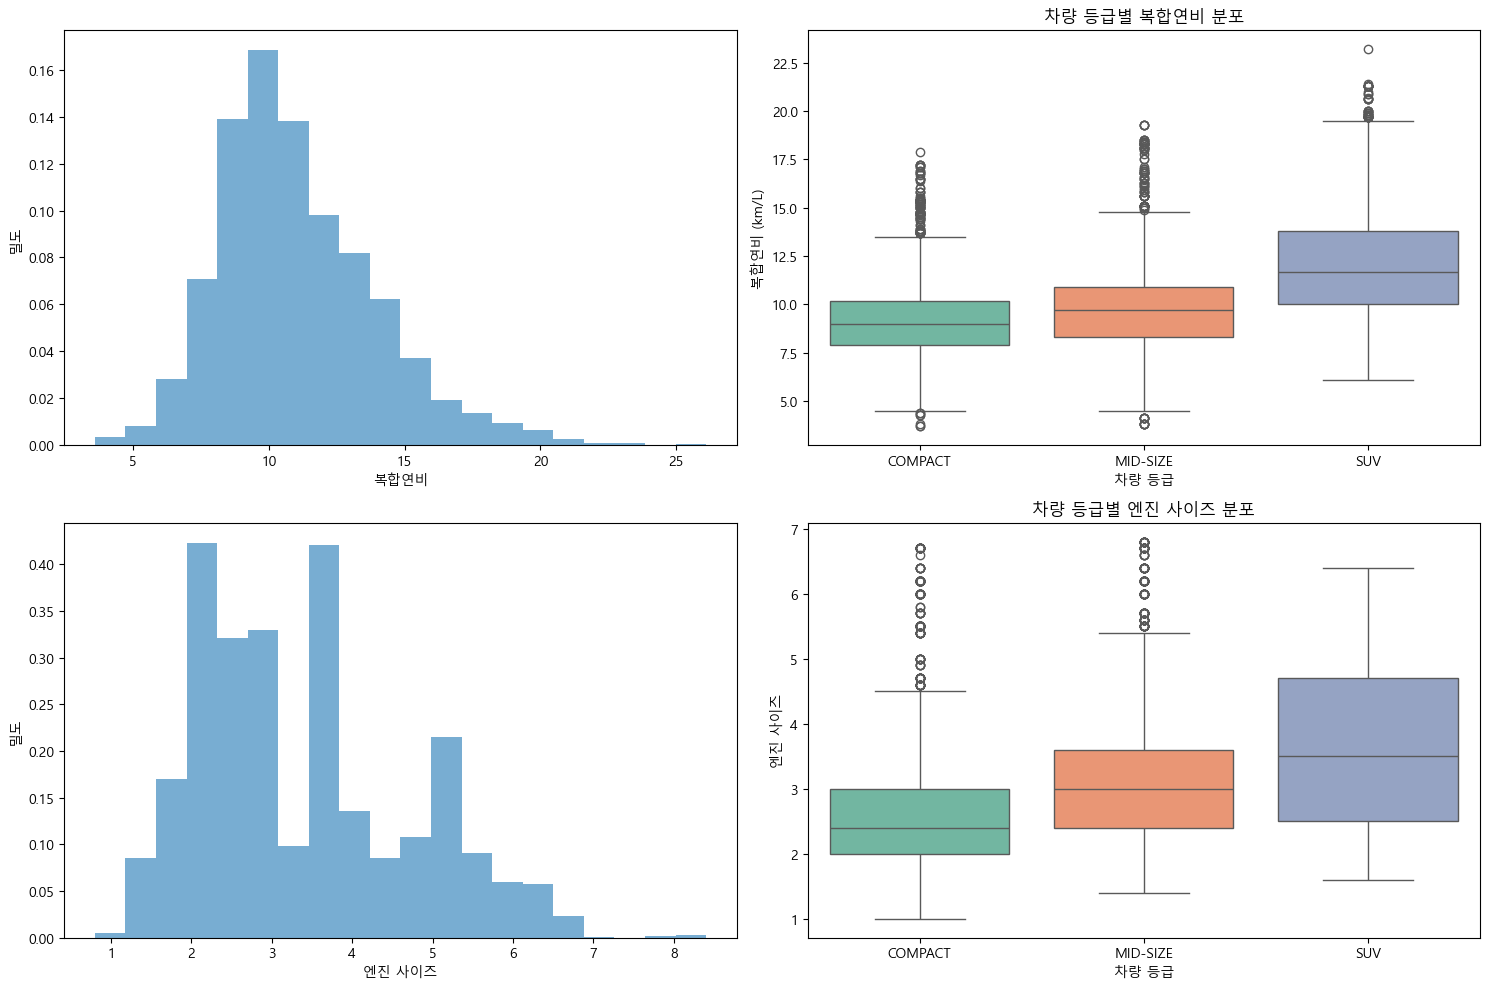

차량등급별 복합연비 표준편차:  VEHICLE CLASS
COMPACT     2.034642
MID-SIZE    2.328445
SUV         2.705243
Name: COMB (L/100 km), dtype: float64
차량등급별 엔진사이즈 표준편차:  VEHICLE CLASS
COMPACT     1.094514
MID-SIZE    1.144793
SUV         1.198494
Name: ENGINE SIZE, dtype: float64
복합연비와 엔진사이즈 모두 SUV 차량에서 표준편차가 큰 경향성을 보인다.


In [11]:
# TODO 1: 두 변수의 산포 측도 계산
# COMB (L/100 km) 산포 측도
comb = df["COMB (L/100 km)"]

print(f"분산 (모집단) : {comb.var(ddof=0):.4f}")
print(f"표준편차 (모집단) : {comb.std(ddof=0):.4f}")
print(f"범위 : {comb.max() - comb.min():.4f}")
comb_Q1 = comb.quantile(0.25)
comb_Q3 = comb.quantile(0.75)
print(f"IQR : {comb_Q3 - comb_Q1:.4f}")

# ENGINE SIZE 산포 측도
engine = df["ENGINE SIZE"]

print(f"분산 (모집단) : {engine.var(ddof=0):.4f}")
print(f"표준편차 (모집단) : {engine.std(ddof=0):.4f}")
print(f"범위 : {engine.max() - engine.min():.4f}")
engine_Q1 = engine.quantile(0.25)
engine_Q3 = engine.quantile(0.75)
print(f"IQR : {engine_Q3 - engine_Q1:.4f}")




# TODO 2: 변동계수(CV) 계산
print('comb 변동계수', (comb.std() / comb.mean())* 100)
print('engine size 변동계수', (engine.std() / engine.mean())* 100)

# TODO 3: 이상치 탐지 (IQR, Z-score)
#COMB (L/100 km) 이상치 탐지
comb_IQR = comb_Q3 - comb_Q1
c_iqr_lower = comb_Q1 - (1.5 * comb_IQR)
c_iqr_upper = comb_Q3 + (1.5 * comb_IQR)
c_iqr_outliers = comb[(comb < c_iqr_lower)| (comb > c_iqr_upper)]
print('IQR 이상치 개수: ',  len(c_iqr_outliers))

c_z_score = (comb - comb.mean()) / comb.std()
c_z_outliers_2 = comb[np.abs(c_z_score) > 2]
c_z_outliers_3 = comb[np.abs(c_z_score) > 3]

print('comb |Z-score| > 2 이상치 개수:', len(c_z_outliers_2))
print('comb |Z-score| > 3 이상치 개수:', len(c_z_outliers_3))

# ENGINE SIZE 이상치 탐지
engine_IQR = engine_Q3 - engine_Q1
e_iqr_lower = engine_Q1 - (1.5 * engine_IQR)
e_iqr_upper = engine_Q3 + (1.5 * engine_IQR)
e_iqr_outliers = engine[(engine < e_iqr_lower)| (engine > e_iqr_upper)]
print('IQR 이상치 개수: ',  len(e_iqr_outliers))

e_z_score = (engine - engine.mean()) / engine.std()
e_z_outliers_2 = engine[np.abs(e_z_score) > 2]
e_z_outliers_3 = engine[np.abs(e_z_score) > 3]

print('engine size |Z-score| > 2 이상치 개수:', len(e_z_outliers_2))
print('engine size |Z-score| > 3 이상치 개수:', len(e_z_outliers_3))

# TODO 4: 2×2 시각화: 각 변수의 히스토그램 + 차량등급별 박스플롯
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

axes[0, 0].hist(comb, bins = 20, alpha = 0.6, density = True)
axes[0, 0].set_xlabel('복합연비')
axes[0, 0].set_ylabel('밀도')

df_clean = df[df['VEHICLE CLASS'].isin(['COMPACT', 'MID-SIZE', 'SUV'])]
sns.boxplot(data = df_clean, x = 'VEHICLE CLASS', y= 'COMB (L/100 km)', palette = 'Set2', ax = axes[0,1])
axes[0, 1].set_title('차량 등급별 복합연비 분포')
axes[0, 1].set_xlabel('차량 등급')
axes[0, 1].set_ylabel('복합연비 (km/L)')

axes[1, 0].hist(engine, bins = 20, alpha = 0.6, density = True)
axes[1, 0].set_xlabel('엔진 사이즈')
axes[1, 0].set_ylabel('밀도')

sns.boxplot(data = df_clean, x = 'VEHICLE CLASS', y= 'ENGINE SIZE', palette = 'Set2', ax = axes[1,1])
axes[1, 1].set_title('차량 등급별 엔진 사이즈 분포')
axes[1, 1].set_xlabel('차량 등급')
axes[1, 1].set_ylabel('엔진 사이즈')

plt.tight_layout()
plt.show()
# TODO 5: 차량등급별(COMPACT, MID-SIZE, SUV) 표준편차 비교
print('차량등급별 복합연비 표준편차: ', df_clean.groupby('VEHICLE CLASS')['COMB (L/100 km)'].std())

print('차량등급별 엔진사이즈 표준편차: ', df_clean.groupby('VEHICLE CLASS')['ENGINE SIZE'].std())

# TODO 6: 결과 해석
print('복합연비와 엔진사이즈 모두 SUV 차량에서 표준편차가 큰 경향성을 보인다.')

,COMB (L/100 km),ENGINE SIZE
분산,8.473455,1.783360
표준편차,2.910920,1.335425
최솟값,3.600000,0.800000
최댓값,26.100000,8.400000
범위,22.500000,7.600000
IQR,3.600000,1.900000
CV(%),26.380551,39.784514


COMB (L/100 km)의 IQR 이상치 경계값 3.7 18.099999999999998
z_score_2: 1124
z_score_3: 219
ENGINE SIZE의 IQR 이상치 경계값 -0.5500000000000007 7.050000000000001
z_score_2: 762
z_score_3: 41


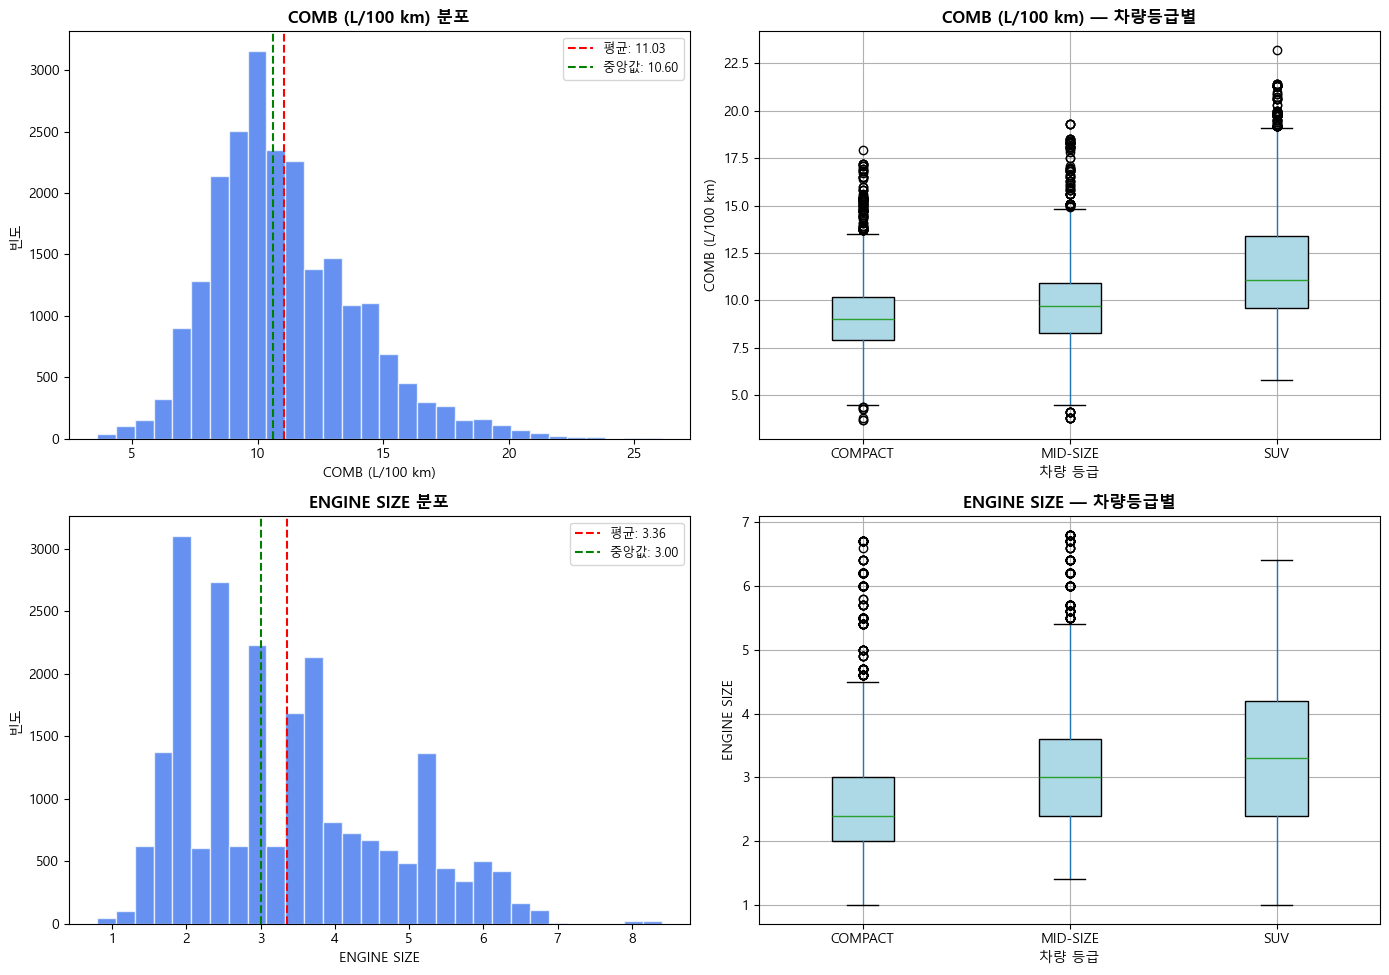

COMB (L/100 km)            ENGINE SIZE           
                         표준편차      CV(%)        표준편차      CV(%)
VEHICLE CLASS                                                  
COMPACT              2.034642  22.161914    1.094514  42.212478
MID-SIZE             2.328445  23.780743    1.144793  36.568764
SUV                  2.705243  22.391587    1.198494  32.327188

COMB랑 ENGINE_SIZE 중 COMB가 표준편차의 절댓값은 크지만, 상대적인 산포도는 ENGINE SIZE가 더 큽니다!


In [17]:
# 수업시간 정답 코드

# TODO 1: 두 변수의 산포 측도 계산
# TODO 2: 변동계수(CV) 계산
# **COMB (L/100 km)** 와 **ENGINE SIZE
stats_df = df[['COMB (L/100 km)', 'ENGINE SIZE']].agg(['var', 'std', 'min', 'max', 
                                                       lambda data : data.max()-data.min(),
                                                       lambda data : data.quantile(0.75)-data.quantile(0.25),
                                                       lambda data : data.std() / data.mean() * 100
                                                       ])
stats_df.index = ['분산', '표준편차', '최솟값', '최댓값', '범위', 'IQR', 'CV(%)']
display(stats_df)

engine_cv = df['ENGINE SIZE'].std() / df['ENGINE SIZE'].mean() *100

# TODO 3: 이상치 탐지 (IQR, Z-score)
for col in ['COMB (L/100 km)', 'ENGINE SIZE'] :
    # df[col], df[[col]] 차이점 : 시리즈와, 데이터 프레임
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    iqr_val = Q3 - Q1
    lower_bound = Q1 - 1.5 * iqr_val
    upper_bound = Q3 + 1.5 * iqr_val
    print(f"{col}의 IQR 이상치 경계값", lower_bound, upper_bound)

    z_score = np.abs(stats.zscore(df[col]))
    z_outliers_2 = df[col][z_score >2]
    z_outliers_3 = df[col][z_score >3]
    print('z_score_2:', len(z_outliers_2))
    print('z_score_3:', len(z_outliers_3))
# TODO 4: 2×2 시각화: 각 변수의 히스토그램 + 차량등급별 박스플롯
variables = {'COMB (L/100 km)': df['COMB (L/100 km)'], 'ENGINE SIZE': df['ENGINE SIZE']}
df_viz = df[df['VEHICLE CLASS'].isin(['COMPACT', 'MID-SIZE']) | df['VEHICLE CLASS'].str.contains('SUV')].copy()
df_viz['CLASS_GROUP'] = df_viz['VEHICLE CLASS'].apply(lambda x: 'SUV' if 'SUV' in x else x)
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
for i, (col_name, col_data) in enumerate(variables.items()):
    axes[i, 0].hist(col_data, bins=30, edgecolor='white', alpha=0.7, color='#2563EB')
    axes[i, 0].axvline(col_data.mean(), color='red', linestyle='--', label=f'평균: {col_data.mean():.2f}')
    axes[i, 0].axvline(col_data.median(), color='green', linestyle='--', label=f'중앙값: {col_data.median():.2f}')
    axes[i, 0].set_title(f'{col_name} 분포', fontweight='bold')
    axes[i, 0].set_xlabel(col_name)
    axes[i, 0].set_ylabel('빈도')
    axes[i, 0].legend(fontsize=9)

    df_viz.boxplot(column=col_name, by='CLASS_GROUP', ax=axes[i, 1],
                   patch_artist=True, boxprops=dict(facecolor='lightblue'))
    axes[i, 1].set_title(f'{col_name} — 차량등급별', fontweight='bold')
    axes[i, 1].set_xlabel('차량 등급')
    axes[i, 1].set_ylabel(col_name)
plt.suptitle('')
plt.tight_layout()
plt.show()


# TODO 5: 차량등급별(COMPACT, MID-SIZE, SUV) 표준편차 비교
group_results = emissions_grade_df.groupby('VEHICLE CLASS')[['COMB (L/100 km)', 'ENGINE SIZE']].agg([
    ('표준편차', 'std'),
    ('CV(%)', lambda data : (data.std() / data.mean())*100 )
]) #set말고 리스트 쓰기! 순서보장!! 
display(group_results)

# TODO 6: 결과 해석
print('COMB랑 ENGINE_SIZE 중 COMB가 표준편차의 절댓값은 크지만, 상대적인 산포도는 ENGINE SIZE가 더 큽니다!')

---

## 📝 실습 문제 3: 분포의 형태 (왜도, 첨도)

### 배경
4가지 수치형 변수의 **왜도와 첨도**를 분석하여 분포 형태를 파악합니다.

### 이론 복습

**왜도**
| 왜도 | 의미 | 평균 vs 중앙값 |
|------|------|---------------|
| = 0 | 대칭 | 평균 ≈ 중앙값 |
| > 0 | 오른쪽 꼬리 | 평균 > 중앙값 |
| < 0 | 왼쪽 꼬리 | 평균 < 중앙값 |


**초과 첨도**
| 첨도 | 의미 |
|------|------|
| = 0 | 정규분포와 동일 |
| > 0 | 꼬리 두꺼움 (극단값 많음) |
| < 0 | 꼬리 얇음 (극단값 적음) |

### 수행할 작업
1. 4개 변수의 왜도/첨도 계산: ENGINE SIZE, COMB (L/100 km), COMB (mpg), EMISSIONS
2. 결과를 DataFrame으로 정리 (왜도/첨도 해석 컬럼 포함)
3. 2×2 히스토그램+KDE 시각화 (제목에 왜도/첨도 표시)
    - 각 그래프에 평균(빨강)과 중앙값(초록) 수직선 표시
4. 연료타입(FUEL)별 EMISSIONS 왜도/첨도 비교
5. 결과 해석

In [ ]:
numeric_cols = ['ENGINE SIZE', 'COMB (L/100 km)', 'COMB (mpg)', 'EMISSIONS']

# TODO 1: 왜도/첨도 계산
for col in numeric_cols:
    print(f'{col}: 왜도 = {df[col].skew():.2f}, 첨도 = {df[col].kurt():.2f}')


# TODO 2: 결과 DataFrame 정리 (왜도/첨도 해석 컬럼 포함)
data = {}
for col in numeric_cols:
    data[col] = {
        '왜도' : df[col].skew(),
        '첨도' : df[col].kurt(),
        '해석' : ''
    }

data
TODO 3: 2×2 히스토그램+KDE 시각화 (제목에 왜도/첨도 표시, 평균/중앙값 수직선)
fig, axes = plt.subplot(2,2, figsize = (15, 8))

sns.histplot(data['ENGINE SIZE'], bins = 'auto', ax = axes[0,0])
axes[0,0].set_title(f' 왜도: {data['ENGINE SIZE'].skew()}, 첨도: {data['ENGINE SIZE'].kurt()}')

sns.histplot(data['COMB (L/100 km)'], bins = 'auto', ax = axes[0,1])
axes[0,1].set_title(f'왜도: {data['COMB (L/100 km)'].skew()}, 첨도: {data['COMB (L/100 km)'].kurt()}')
plt.show()
# TODO 4: 연료타입(FUEL)별 EMISSIONS 왜도/첨도 비교
print(df.groupby('FUEL')['EMISSIONS'].skew())
print(df.groupby('FUEL')['EMISSIONS'].kurt())
# TODO 5: 결과 해석

ENGINE SIZE: 왜도 = 0.63, 첨도 = -0.39
COMB (L/100 km): 왜도 = 0.82, 첨도 = 1.05
COMB (mpg): 왜도 = 1.17, 첨도 = 3.64
EMISSIONS: 왜도 = 0.53, 첨도 = 0.62
FUEL
D   -0.367713
E   -0.189320
N   -1.851785
X    0.330538
Z    0.997177
Name: EMISSIONS, dtype: float64
FUEL
D   -1.042831
E   -0.256257
N    3.071255
X   -0.292857
Z    1.607523
Name: EMISSIONS, dtype: float64


---

## 🏆 도전 과제: 라이브러리 없이 기술통계 직접 구현

numpy, scipy 없이 **순수 Python**으로 기술통계 함수를 구현합니다.

### 규칙
- `math.sqrt`만 사용 가능
- 내장 함수 `sum()`, `len()`, `sorted()`, `min()`, `max()` 사용 가능

### 구현할 함수

| 함수 | 설명 |
|------|------|
| `my_mean(data)` | 산술평균 |
| `my_trimmed_mean(data, proportion)` | 절사평균 (양쪽 proportion 비율 제거) |
| `my_weighted_mean(data, weights)` | 가중평균 |
| `my_median(data)` | 중앙값 |
| `my_mode(data)` | 최빈값 |
| `my_variance(data, ddof=0)` | 분산 (ddof=0: 모분산, ddof=1: 표본분산) |
| `my_std(data, ddof=0)` | 표준편차 |
| `my_percentile(data, q)` | 퍼센타일 (Nearest Rank 방식) |
| `my_iqr(data)` | 사분위범위 (Q3 - Q1) |

In [ ]:
import math


def my_mean(data):
    """
    산술평균: 합계 / 개수
    
    Parameters
    ----------
    data : list
        숫자 리스트
    
    Returns
    -------
    float
        산술평균 값
    
    Examples
    --------
    >>> my_mean([1, 2, 3, 4, 5])
    3.0
    >>> my_mean([10, 20, 30])
    20.0
    """
    pass


def my_trimmed_mean(data, proportion):
    """
    절사평균: 양쪽 끝에서 일정 비율을 제거한 후 평균
    
    Parameters
    ----------
    data : list
        숫자 리스트
    proportion : float
        제거할 비율 (0 ~ 0.5 미만)
        - 0.1이면 양쪽에서 각각 10%씩 제거 (총 20% 제거)
        - 0.25이면 양쪽에서 각각 25%씩 제거 (총 50% 제거)
    
    Returns
    -------
    float
        절사평균 값
    
    Notes
    -----
    - proportion이 0이면 산술평균과 동일
    - proportion이 0.5에 가까우면 중앙값에 가까워짐
    - 이상치에 민감한 산술평균의 단점을 보완
    
    Examples
    --------
    >>> my_trimmed_mean([1, 2, 3, 4, 100], 0.2)  # 양쪽 1개씩 제거
    3.0  # [2, 3, 4]의 평균
    >>> my_trimmed_mean([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 0.1)  # 양쪽 1개씩 제거
    5.5  # [2, 3, 4, 5, 6, 7, 8, 9]의 평균
    """
    sorted_data = sorted(data)
    n = len(data)

    lower_bound = int(n * proportion) # 인덱스화 하기 위해 실수값을 정수로 변경
    upper_bound = n - lower_bound

    trim_data = sorted_data[lower_bound : upper_bound]

    return sum(trim_data) / len(trim_data)


def my_weighted_mean(data, weights):
    """
    가중평균: 각 값에 가중치를 곱한 후 평균
    
    Parameters
    ----------
    data : list
        숫자 리스트
    weights : list
        가중치 리스트 (data와 길이가 같아야 함)
    
    Returns
    -------
    float
        가중평균 값
    
    Notes
    -----
    - 가중치의 합이 1이 아니어도 됨 (내부에서 정규화)
    - 모든 가중치가 같으면 산술평균과 동일
    
    Examples
    --------
    >>> my_weighted_mean([80, 90, 70], [3, 3, 2])  # 학점 계산
    80.0  # (80*3 + 90*3 + 70*2) / (3+3+2)
    >>> my_weighted_mean([100, 200], [1, 1])  # 동일 가중치
    150.0  # 산술평균과 동일
    """
    pass


def my_median(data):
    """
    중앙값: 정렬 후 가운데 값 (짝수면 두 값의 평균)
    
    Parameters
    ----------
    data : list
        숫자 리스트
    
    Returns
    -------
    float
        중앙값
    
    Examples
    --------
    >>> my_median([1, 3, 5])  # 홀수 개
    3.0
    >>> my_median([1, 2, 3, 4])  # 짝수 개
    2.5  # (2 + 3) / 2
    """
    pass


def my_mode(data):
    """
    최빈값: 가장 빈번한 값
    
    Parameters
    ----------
    data : list
        숫자 리스트
    
    Returns
    -------
    int or float
        가장 빈번하게 등장하는 값 (동률이면 먼저 나온 값)
    
    Examples
    --------
    >>> my_mode([1, 2, 2, 3, 3, 3])
    3
    >>> my_mode([1, 1, 2, 2])  # 동률: 먼저 나온 1 반환
    1
    """
    
    if not data:
        return None

    counts = {

    }
    for i in data:



def my_variance(data, ddof=0):
    """
    분산: 편차 제곱의 평균
    
    Parameters
    ----------
    data : list
        숫자 리스트
    ddof : int, default=0
        자유도 조정값 (Delta Degrees of Freedom)
        - ddof=0: 모분산 (N으로 나눔)
        - ddof=1: 표본분산 (N-1로 나눔, 베셀 보정)
    
    Returns
    -------
    float
        분산 값
    
    Examples
    --------
    >>> my_variance([1, 2, 3, 4, 5], ddof=0)  # 모분산
    2.0
    >>> my_variance([1, 2, 3, 4, 5], ddof=1)  # 표본분산
    2.5
    """
    pass


def my_std(data, ddof=0):
    """
    표준편차: 분산의 제곱근
    
    Parameters
    ----------
    data : list
        숫자 리스트
    ddof : int, default=0
        자유도 조정값 (my_variance와 동일)
    
    Returns
    -------
    float
        표준편차 값
    
    Examples
    --------
    >>> my_std([1, 2, 3, 4, 5], ddof=0)  # 모표준편차
    1.4142...
    >>> my_std([1, 2, 3, 4, 5], ddof=1)  # 표본표준편차
    1.5811...
    """
    pass


def my_percentile(data, q):
    """
    q번째 퍼센타일 (Nearest Rank 방식)
    
    Parameters
    ----------
    data : list
        숫자 리스트
    q : float
        퍼센타일 값 (0 ~ 100)
    
    Returns
    -------
    float
        q번째 퍼센타일 값 (실제 데이터 중 하나)
    
    Notes
    -----
    - Nearest Rank 방식: 계산된 위치에서 가장 가까운 인덱스의 실제 값 반환
    - q=0: 최솟값, q=100: 최댓값, q=50: 중앙값 근사
    
    Examples
    --------
    >>> my_percentile([1, 2, 3, 4, 5], 0)
    1  # 최솟값
    >>> my_percentile([1, 2, 3, 4, 5], 50)
    3  # 중앙 위치 값
    >>> my_percentile([1, 2, 3, 4, 5], 100)
    5  # 최댓값
    >>> my_percentile([10, 20, 30, 40, 50, 60, 70, 80, 90, 100], 25)
    30  # 인덱스 round(9 * 0.25) = 2 → 30
    """
    pass


def my_iqr(data):
    """
    사분위범위(IQR): Q3 - Q1 (Nearest Rank 방식)
    
    Parameters
    ----------
    data : list
        숫자 리스트
    
    Returns
    -------
    float
        IQR 값 (75번째 퍼센타일 - 25번째 퍼센타일)
    
    Examples
    --------
    >>> my_iqr([1, 2, 3, 4, 5, 6, 7])  # 인덱스: 0~6
    4.0  # Q3(인덱스 5→6) - Q1(인덱스 2→2) = 6 - 2 = 4
    >>> my_iqr([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
    5.0  # Q3(8) - Q1(3) = 5
    """
    pass

In [21]:
# 검증 코드
import numpy as np
from scipy import stats

print("\n" + "="*60)
print("검증 결과")
print("="*60)

# 테스트 데이터
test_data = [4, 7, 2, 9, 1, 5, 3, 8, 6, 5]
test_odd = [3, 1, 4, 1, 5]
test_single = [42]
test_same = [7, 7, 7, 7, 7]
test_negative = [-5, -2, 0, 3, 7]
test_outlier = [1, 2, 3, 4, 100]

all_pass = True
total = 0
passed = 0

def check(name, mine, expected, tol=0.001):
    global all_pass, total, passed
    total += 1
    if mine is None:
        print(f"  ❌ {name}: 미구현")
        all_pass = False
    else:
        try:
            match = abs(float(mine) - float(expected)) < tol
            if match:
                passed += 1
                print(f"  ✅ {name}: {float(mine):.4f}")
            else:
                all_pass = False
                print(f"  ❌ {name}: {float(mine):.4f} (정답: {float(expected):.4f})")
        except:
            all_pass = False
            print(f"  ❌ {name}: 오류 발생")

# 1. 산술평균
print("\n[my_mean]")
check("기본 데이터", my_mean(test_data), np.mean(test_data))
check("홀수 개", my_mean(test_odd), np.mean(test_odd))
check("단일 값", my_mean(test_single), np.mean(test_single))
check("음수 포함", my_mean(test_negative), np.mean(test_negative))

# 2. 절사평균
print("\n[my_trimmed_mean]")
check("20% 절사", my_trimmed_mean(test_outlier, 0.2), stats.trim_mean(test_outlier, 0.2))
check("10% 절사", my_trimmed_mean(test_data, 0.1), stats.trim_mean(test_data, 0.1))
check("0% 절사", my_trimmed_mean(test_data, 0), stats.trim_mean(test_data, 0))

# 3. 가중평균
print("\n[my_weighted_mean]")
check("학점 계산", my_weighted_mean([80, 90, 70], [3, 3, 2]), np.average([80, 90, 70], weights=[3, 3, 2]))
check("동일 가중치", my_weighted_mean([100, 200], [1, 1]), np.average([100, 200], weights=[1, 1]))
check("가중치 다름", my_weighted_mean([10, 20, 30], [1, 2, 3]), np.average([10, 20, 30], weights=[1, 2, 3]))

# 4. 중앙값
print("\n[my_median]")
check("짝수 개", my_median(test_data), np.median(test_data))
check("홀수 개", my_median(test_odd), np.median(test_odd))
check("단일 값", my_median(test_single), np.median(test_single))
check("음수 포함", my_median(test_negative), np.median(test_negative))

# 5. 최빈값
print("\n[my_mode]")
check("기본 (5가 2번)", my_mode(test_data), stats.mode(test_data, keepdims=False).mode)
check("홀수 (1이 2번)", my_mode(test_odd), stats.mode(test_odd, keepdims=False).mode)
check("동일 값", my_mode(test_same), stats.mode(test_same, keepdims=False).mode)

# 6. 분산
print("\n[my_variance]")
check("모분산 (ddof=0)", my_variance(test_data, 0), np.var(test_data, ddof=0))
check("표본분산 (ddof=1)", my_variance(test_data, 1), np.var(test_data, ddof=1))
check("동일 값 → 0", my_variance(test_same, 0), np.var(test_same, ddof=0))

# 7. 표준편차
print("\n[my_std]")
check("모표준편차", my_std(test_data, 0), np.std(test_data, ddof=0))
check("표본표준편차", my_std(test_data, 1), np.std(test_data, ddof=1))
check("동일 값 → 0", my_std(test_same, 0), np.std(test_same, ddof=0))

# 8. 퍼센타일 (Nearest Rank 방식)
# 주의: numpy는 선형보간 사용, Nearest Rank는 직접 계산
print("\n[my_percentile] - Nearest Rank 방식")
sorted_test = sorted(test_data)  # [1, 2, 3, 4, 5, 5, 6, 7, 8, 9]
check("0% (최솟값)", my_percentile(test_data, 0), min(test_data))
check("50% (중앙값)", my_percentile(test_data, 50), sorted_test[round((len(test_data)-1) * 0.5)])
check("100% (최댓값)", my_percentile(test_data, 100), max(test_data))
# 25%, 75%는 Nearest Rank 방식으로 직접 계산
check("25%", my_percentile(test_data, 25), sorted_test[round((len(test_data)-1) * 0.25)])
check("75%", my_percentile(test_data, 75), sorted_test[round((len(test_data)-1) * 0.75)])

# 9. IQR (Nearest Rank 기준)
print("\n[my_iqr]")
expected_iqr = sorted_test[round((len(test_data)-1) * 0.75)] - sorted_test[round((len(test_data)-1) * 0.25)]
check("기본 데이터", my_iqr(test_data), expected_iqr)
check("동일 값 → 0", my_iqr(test_same), 0)

# 최종 결과
print("\n" + "="*60)
print(f"결과: {passed}/{total} 통과 ({passed/total*100:.0f}%)")
print("="*60)
if all_pass:
    print("🎉 모든 테스트 통과!")
else:
    print("⚠️ 일부 테스트 실패 - 로직을 확인하세요")


검증 결과

[my_mean]
  ❌ 기본 데이터: 미구현
  ❌ 홀수 개: 미구현
  ❌ 단일 값: 미구현
  ❌ 음수 포함: 미구현

[my_trimmed_mean]
  ✅ 20% 절사: 3.0000
  ✅ 10% 절사: 5.0000
  ✅ 0% 절사: 5.0000

[my_weighted_mean]
  ❌ 학점 계산: 미구현
  ❌ 동일 가중치: 미구현
  ❌ 가중치 다름: 미구현

[my_median]
  ❌ 짝수 개: 미구현
  ❌ 홀수 개: 미구현
  ❌ 단일 값: 미구현
  ❌ 음수 포함: 미구현

[my_mode]
  ❌ 기본 (5가 2번): 미구현
  ❌ 홀수 (1이 2번): 미구현
  ❌ 동일 값: 미구현

[my_variance]
  ❌ 모분산 (ddof=0): 미구현
  ❌ 표본분산 (ddof=1): 미구현
  ❌ 동일 값 → 0: 미구현

[my_std]
  ❌ 모표준편차: 미구현
  ❌ 표본표준편차: 미구현
  ❌ 동일 값 → 0: 미구현

[my_percentile] - Nearest Rank 방식
  ❌ 0% (최솟값): 미구현
  ❌ 50% (중앙값): 미구현
  ❌ 100% (최댓값): 미구현
  ❌ 25%: 미구현
  ❌ 75%: 미구현

[my_iqr]
  ❌ 기본 데이터: 미구현
  ❌ 동일 값 → 0: 미구현

결과: 3/30 통과 (10%)
⚠️ 일부 테스트 실패 - 로직을 확인하세요
